Project Title -Student Performance Indicator

Life Cycle of Machine Learning project 

1) Understanding the problem statement.
2) Data collection.
3) Data checks to peform.
4) Exploratory data analysis.
5) Data pre-processing .
6) Model training.
7) choose best model.


1) Problem Statement

*This project understands how the student's performance (test scores) is affected by the other variables such as gender,ethinicity,parental level of education,lunch,test preparation course.

2. Data Collection
* Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download.

* The data consist of 8 columns and 1000 rows.

2.1) Import Data and required packages 

Importing pandas , numpy , matplotlib , seaborn and warnings library.


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"E:\ML Project End to End\notebook\data\StudentsPerformance.csv")

Top 5 records 

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [4]:
df.shape

(1000, 8)

Dataset Information

1) Gender= sex of the students (male/female)-categorical column
2) Race/ethinicity= Group a , B and group c 
3) parental level of education = parent's final education 
4) lunch = having lunch before test (standard/free or reduced ) 
5) test preparation course = complete or not complete before test
6) math score 
7) reading score 
8) writing score 

3) Data checks to perform 

* Check for missing values 
* check duplicates
* check datatype 
* check the number of unique values of each column
* check statistics of data set 
* check various categoris present in the different categorical column

3.1) Check missing values 

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values in this dataset. 

3.2) check for duplicates 

In [6]:
df.duplicated().sum()

np.int64(0)

There is no duplicated values in the dataset

3.3) Check for data types 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4) checking number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5) Check statistics of the dataset 

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights-- 

* From above description of numerical data , all the means are very close to each other - between 66 and 68.05.
* All the standard deviation are close to each other between 14.6 and 15.19
* While there is a minimum score of 0 for maths , for writing minimum is much higher = 10 and for reading 17.

3.6) Exploring Data 

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
print("categories in 'gender' variable: ",end="")
print(df['gender'].unique())

print("categories in 'race/ethinicity' variable: ",end="")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable: ",end="")
print(df['parental level of education'].unique())

print("test preparation course' variable: ",end="")
print(df['test preparation course'].unique())

print("categories in 'lunch' variable: ",end="")
print(df['lunch'].unique())


categories in 'gender' variable: ['female' 'male']
categories in 'race/ethinicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
test preparation course' variable: ['none' 'completed']
categories in 'lunch' variable: ['standard' 'free/reduced']


In [12]:
# Define numerical and categorical columns 
numeric_features=[ feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[ feature for feature in df.columns if df[feature].dtype =='O']

print('we have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features :{}'.format(len(categorical_features),categorical_features))

we have 3 numerical features:['math score', 'reading score', 'writing score']
we have 5 categorical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.7) Adding columns for "Total Score" and "Average"

In [13]:
df['Total score']=df['math score']+df['reading score']+df['writing score']
df['Average score'] = df['Total score']/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


3.8) Calculating no of students scored full marks in each subjects .

In [14]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total score', 'Average score'],
      dtype='object')

In [15]:
reading_full=df[df['reading score']==100]['Average score'].count()
writing_full=df[df['writing score']==100]['Average score'].count()
math_full=df[df['math score']==100]['Average score'].count()

print(f"The number of students with full marks in maths:{math_full}")
print(f"The number of students with full marks in writing:{writing_full}")
print(f"The number of students with full marks in reading : {reading_full}")

The number of students with full marks in maths:7
The number of students with full marks in writing:14
The number of students with full marks in reading : 17


In [16]:
reading_less_than_20 = df[df['reading score']<=20]['Average score'].count()
writing_less_than_20 = df[df['writing score']<=20]['Average score'].count()
maths_less_than_20= df[df['math score']<=20]['Average score'].count()

print(f"The number of students with less than 20 marks in reading:{reading_less_than_20}")
print(f"The number of students with less than 20 marks in writing:{writing_less_than_20}")
print(f"The number of students with less than 20 marks in maths:{maths_less_than_20}")

The number of students with less than 20 marks in reading:1
The number of students with less than 20 marks in writing:3
The number of students with less than 20 marks in maths:4


Insights

* From the above we get that students have performance the worst in maths 
* The best performance is in reading section.

4.Exploring Data (Visualization)


4.1) Visualize average score distribution to make some conclusion 

* Histogram
* Kernel Distribution Function (KDE)

4.1.1) Histogram & KDE

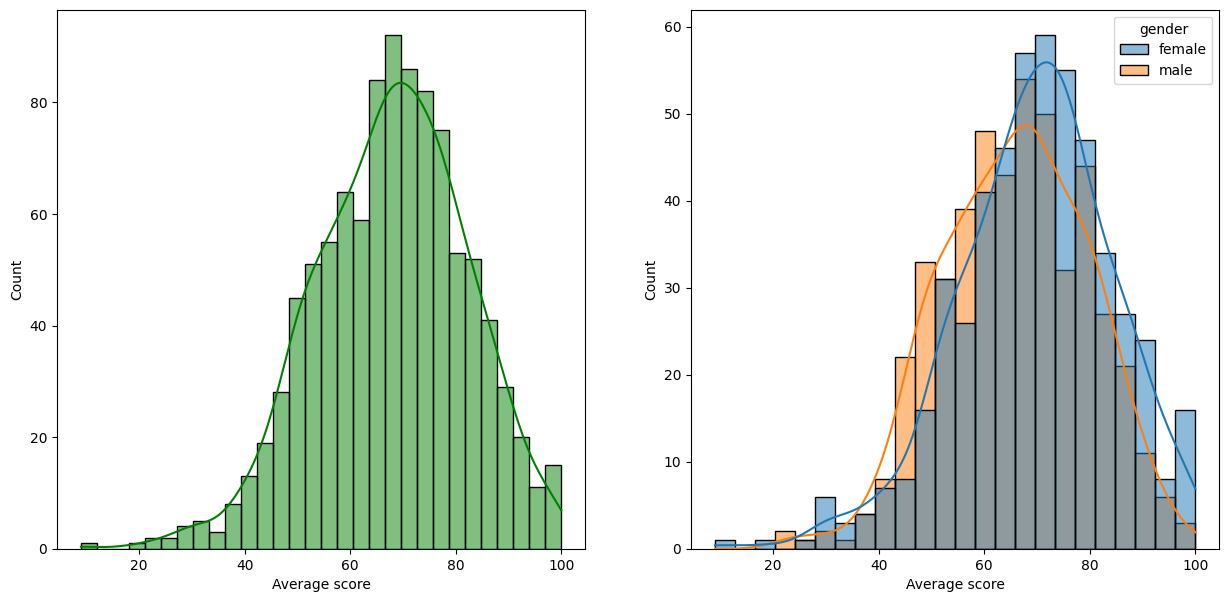

In [18]:
fig , axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average score',kde=True,hue='gender')
plt.show()

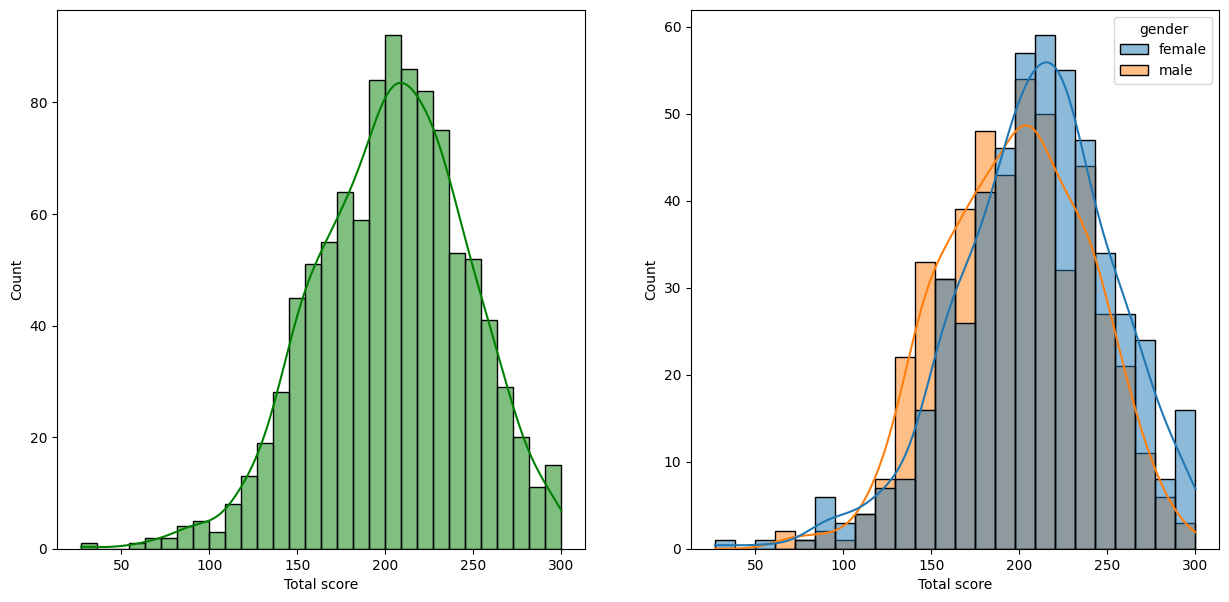

In [20]:
# With respect to total score 
fig , axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total score',kde=True,hue='gender')
plt.show()

Insights-

* Female students tend to perform well than male students

In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total score', 'Average score'],
      dtype='object')

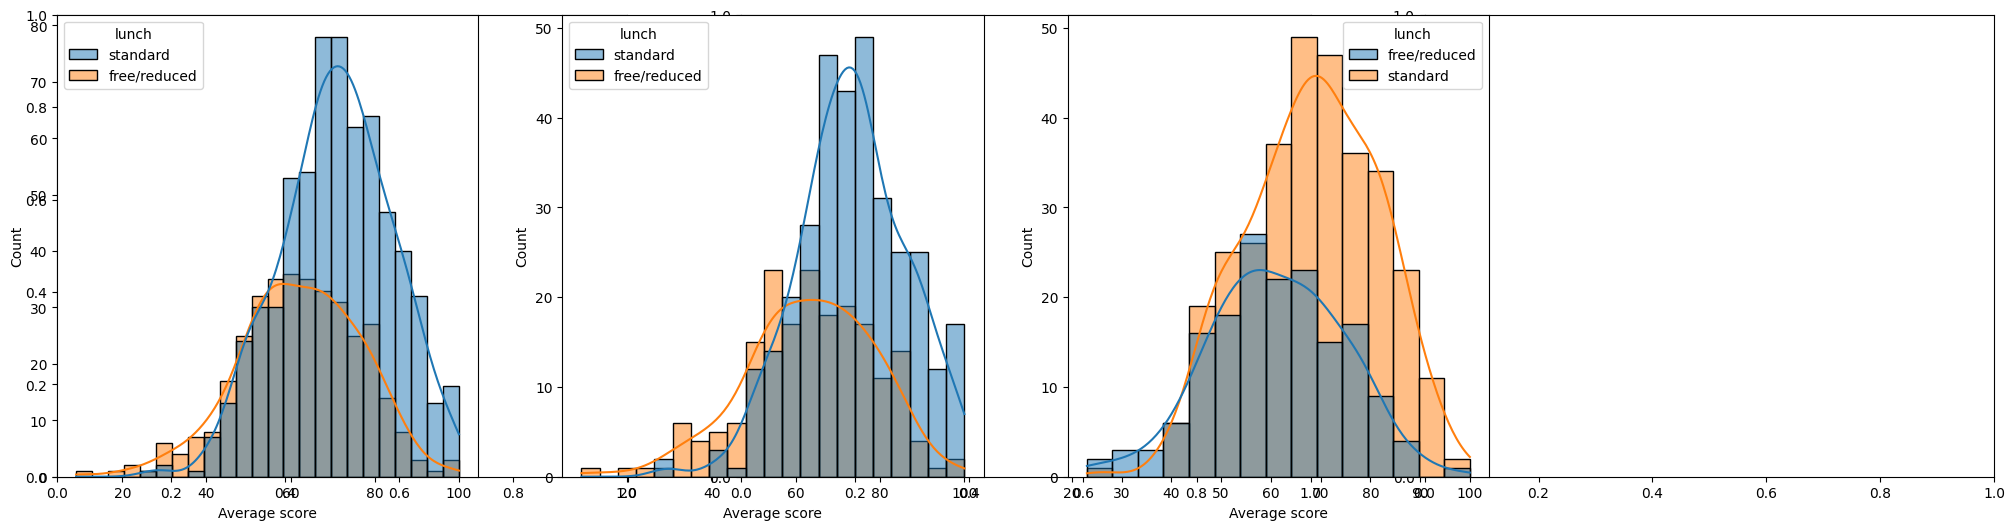

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='lunch')
plt.show()

Insights-

* Standard lunch helps to perform well in exams.
* Standard lunch helps to perform well in the exams be it a male or a female.

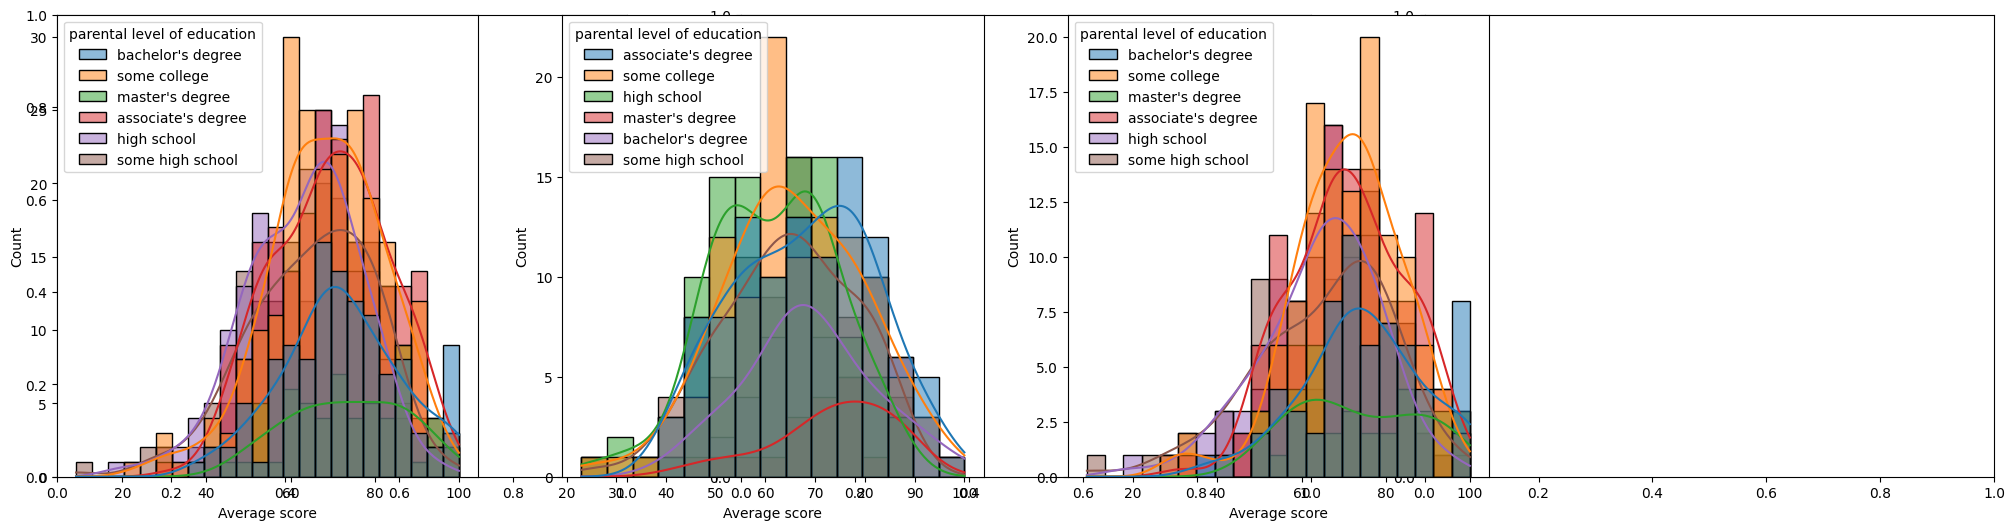

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='Average score',kde=True,hue='parental level of education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='parental level of education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='parental level of education')
plt.show()

Insights 

* In general parents's education dont helps student perform well in exams.
* 2nd plot shows that parents whose education level is masters or associate degree their male child helps perform well in the exams.
* 3rd plot we can see there is no effect of parents education on their female students.

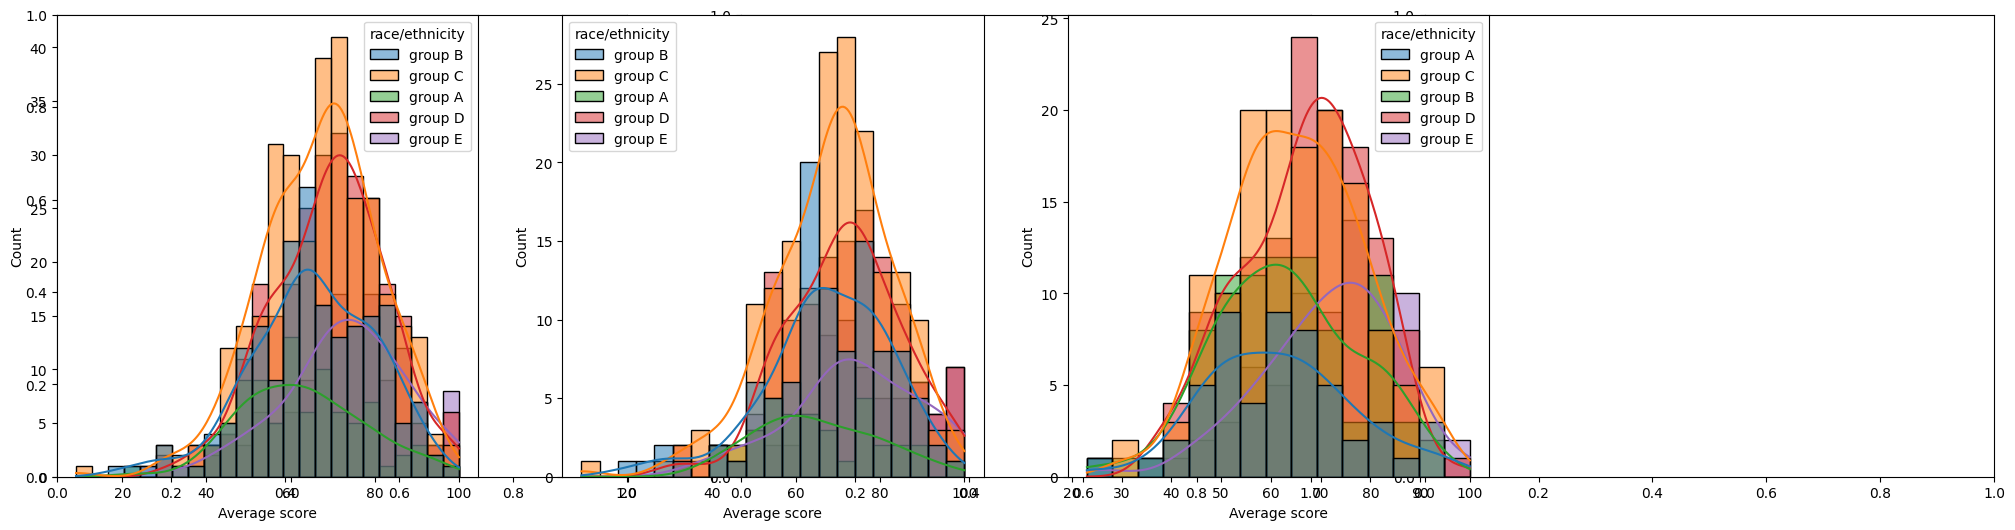

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='Average score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='race/ethnicity')
plt.show()

Insights 

* Students of group A and group B tends to perform poorly in exams.
* Students of group A and group B tends to perform poorly in exams but irrespective of wheather they are male of female.

4.2) Maximum score of students in all three subjects 

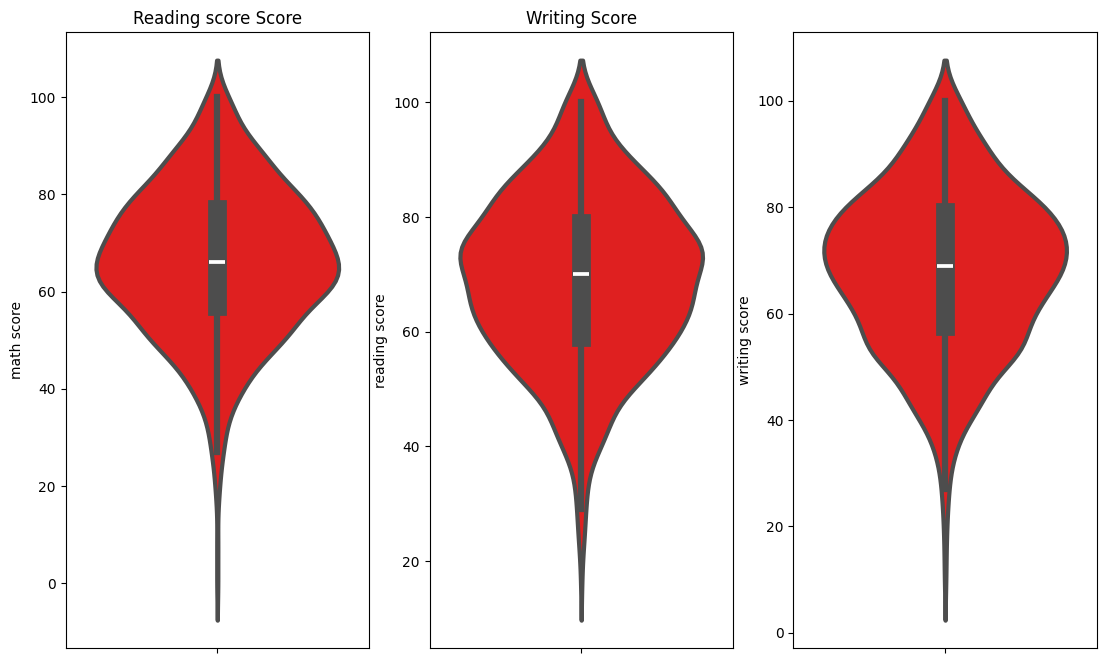

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MAths Score')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)


plt.title('Reading score Score')
plt.subplot(1,4,2)
sns.violinplot(y='reading score',data=df,color='red',linewidth=3)

plt.title('Writing Score')
plt.subplot(1,4,3)
sns.violinplot(y='writing score',data=df,color='red',linewidth=3)

plt.show()

Insights 

* from all the three plotsb its clearly visible that most of the students score is in between 60-80 in maths whereas in reading and writing most of them score from 50-80

4.3) Multivariate analysis using pieplot 

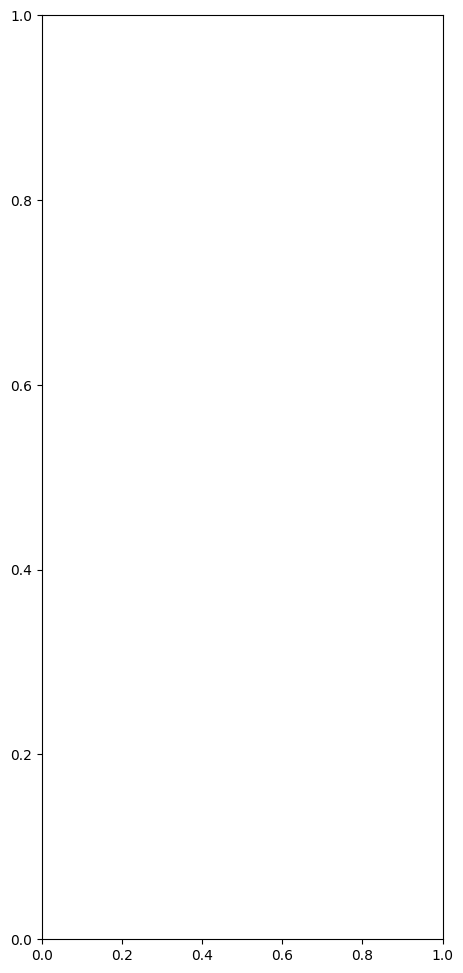

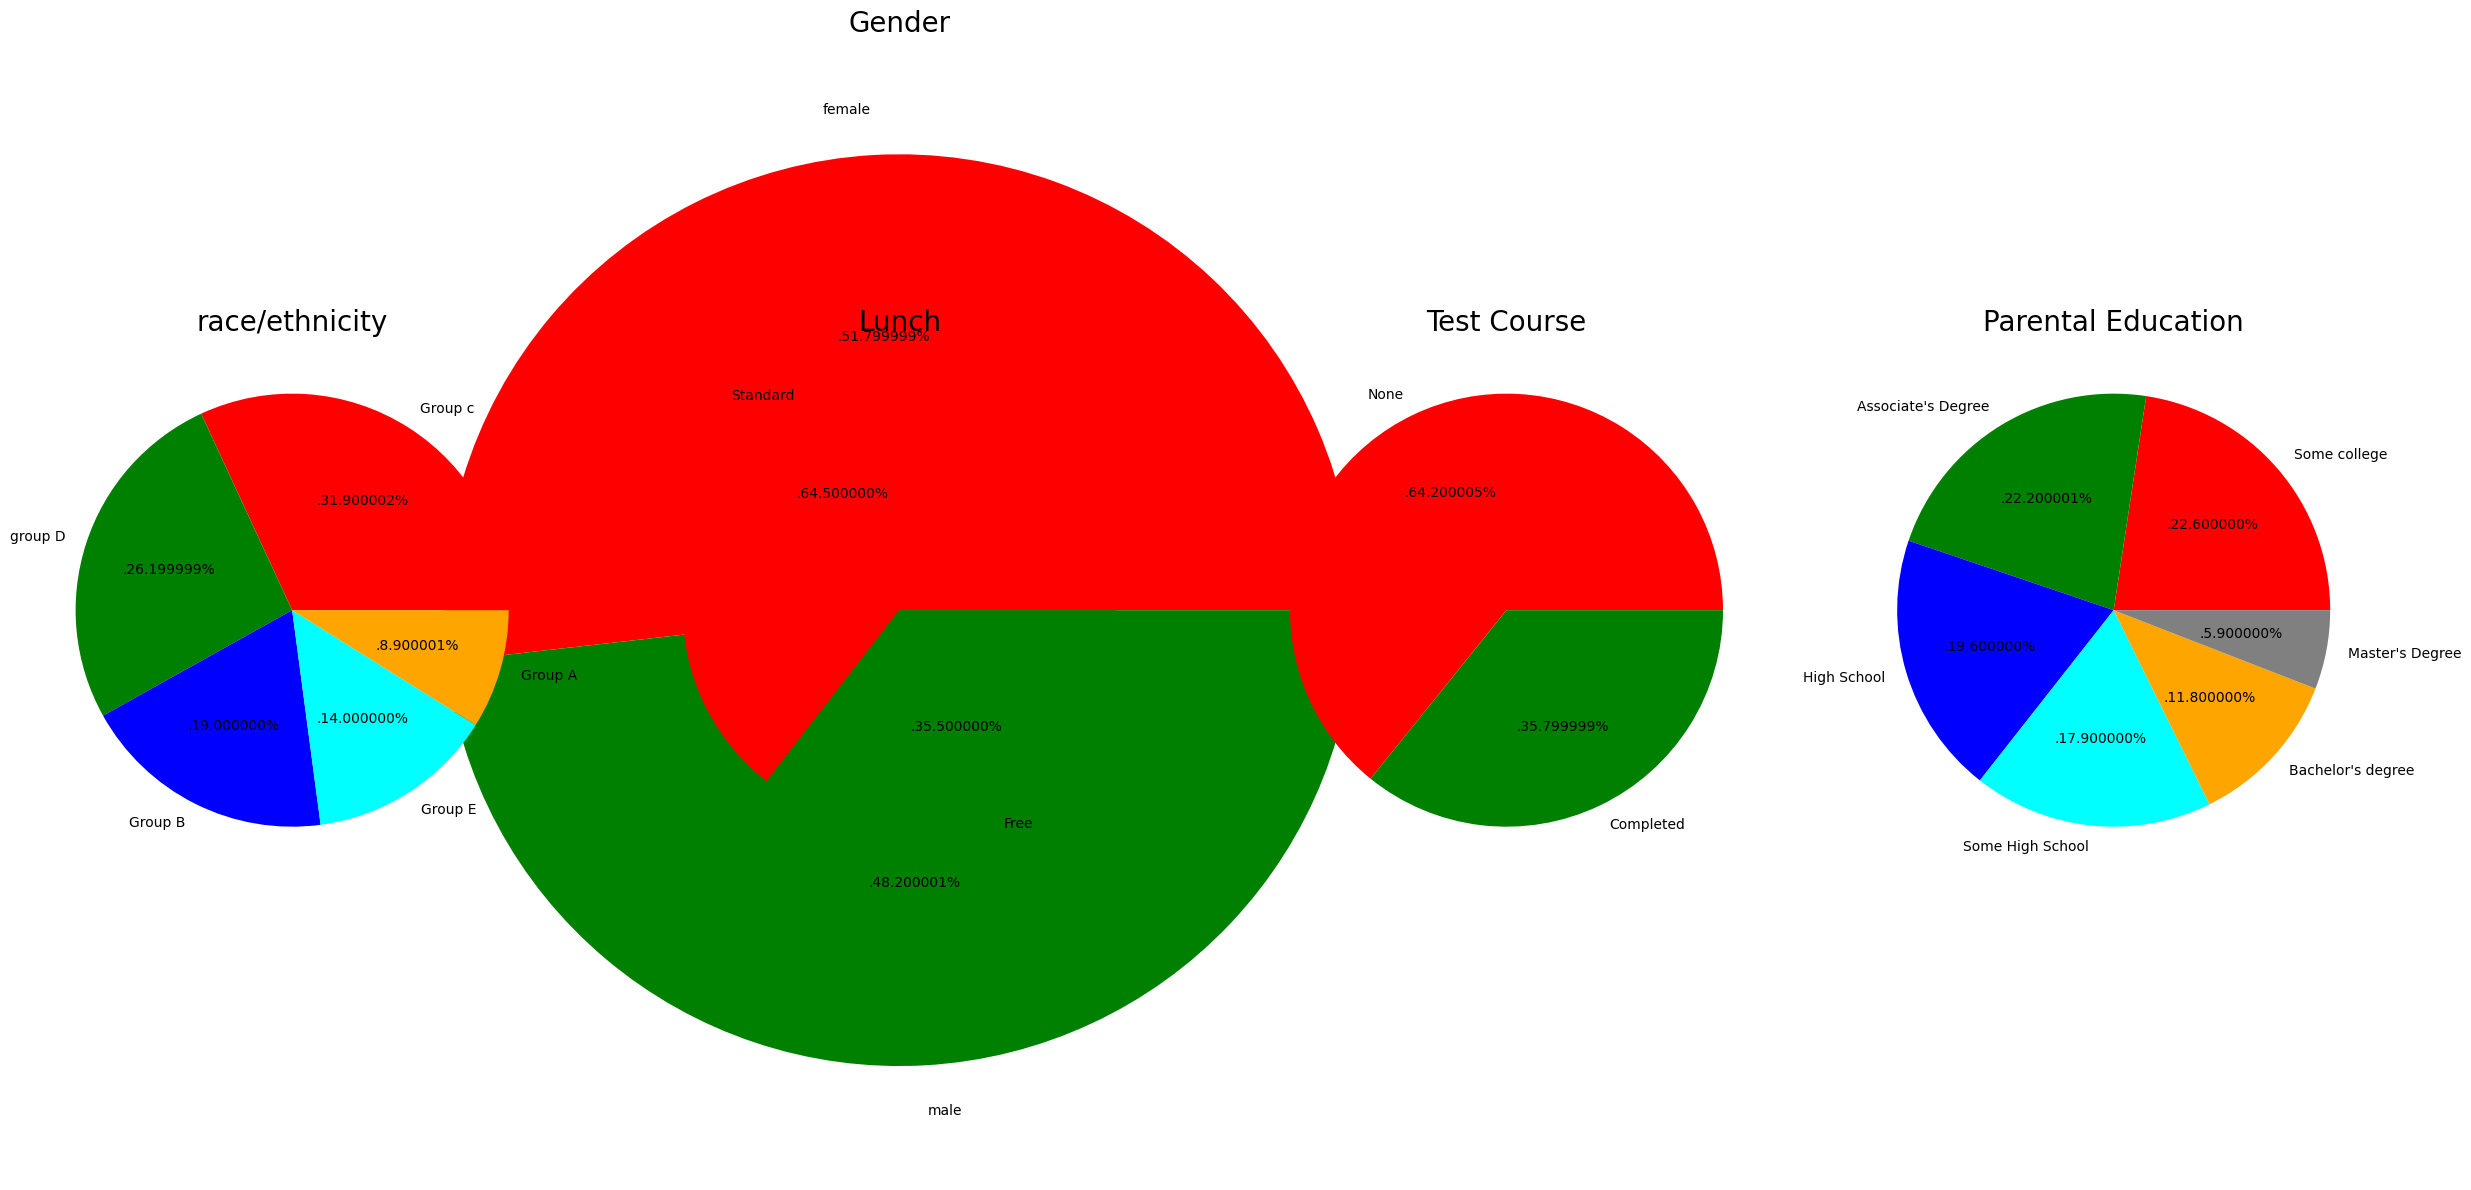

In [40]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='female','male'
color=['red','green']
plt.show()


plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels='Group c','group D','Group B',"Group E",'Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race/ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels='Some college',"Associate's Degree",'High School','Some High School',"Bachelor's degree","Master's Degree"
color=['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()



Insights - 

* Number of male and female students is almost equal.
* Number students are gratest in group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater.
* Number of students whose parental education is "some college" is greater followed closely by "Association Degree"


4.4) Feature Wise Visualization

4.4.1) Gender Column

* How is distribution of gender ?
* Is gender has any impact on students's performance.

Univariate Analysis (distribution of gender)


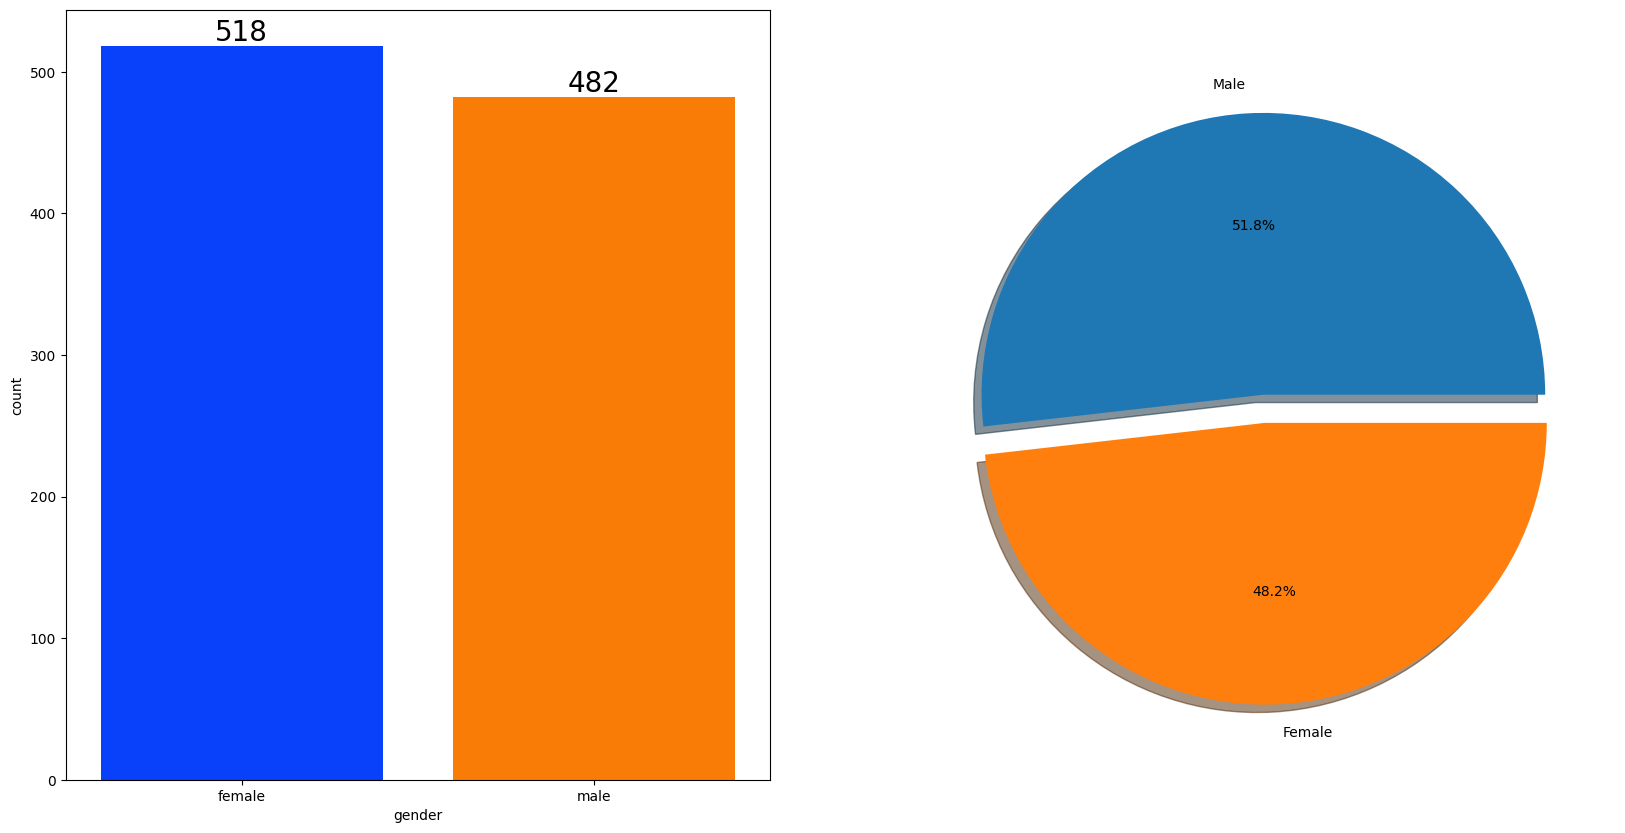

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)


plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()    

Insights -- 
* Gender has the balanced data with female students are 518(48%) and male students areb 482(52%)

Bivariate Abnalysis (is gender has any impact on students performance)

In [47]:
numeric_df = df.select_dtypes(include=[float, int])
gender_group = numeric_df.groupby(df['gender']).mean()
gender_group

,math score,reading score,writing score,Total score,Average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [49]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total score', 'Average score'],
      dtype='object')

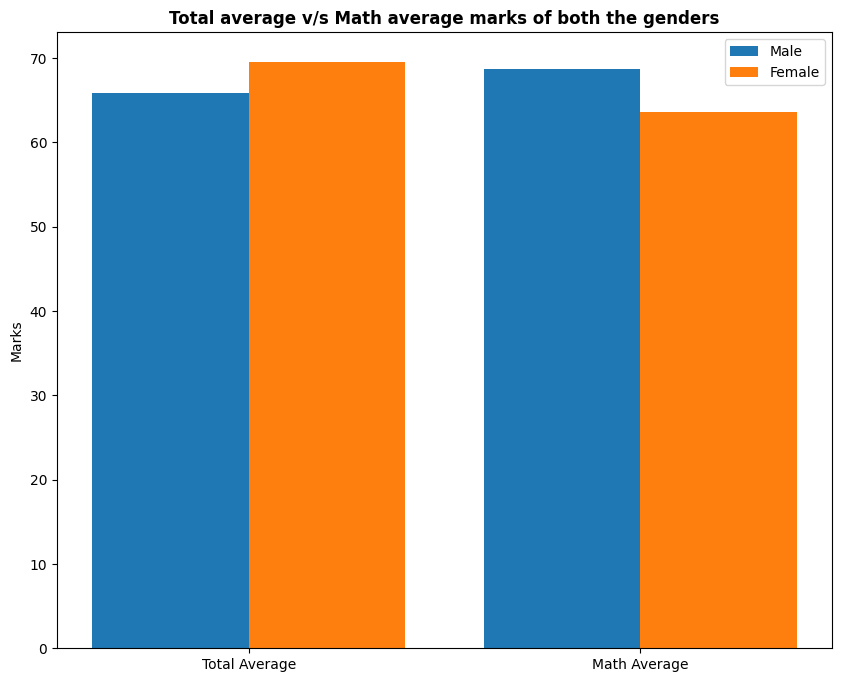

In [51]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average score'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights-

*On an average females have a better overall score than men.
*whereas males have scored higher in Maths.

4.4.2 RACE/EHNICITY COLUMN

How is Group wise distribution ?
Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

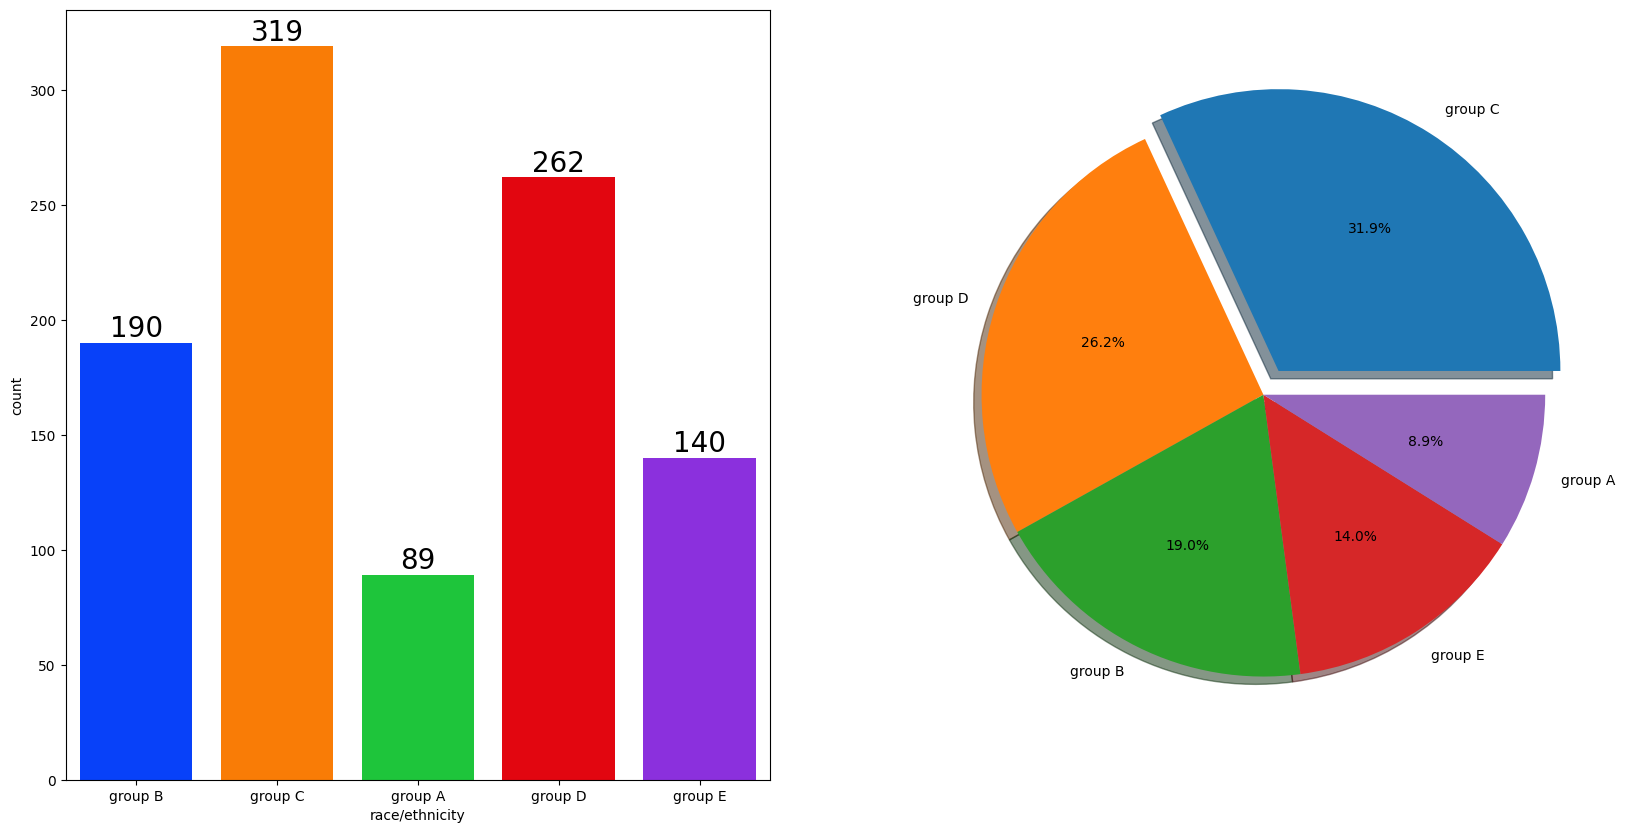

In [54]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

# Insights

* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

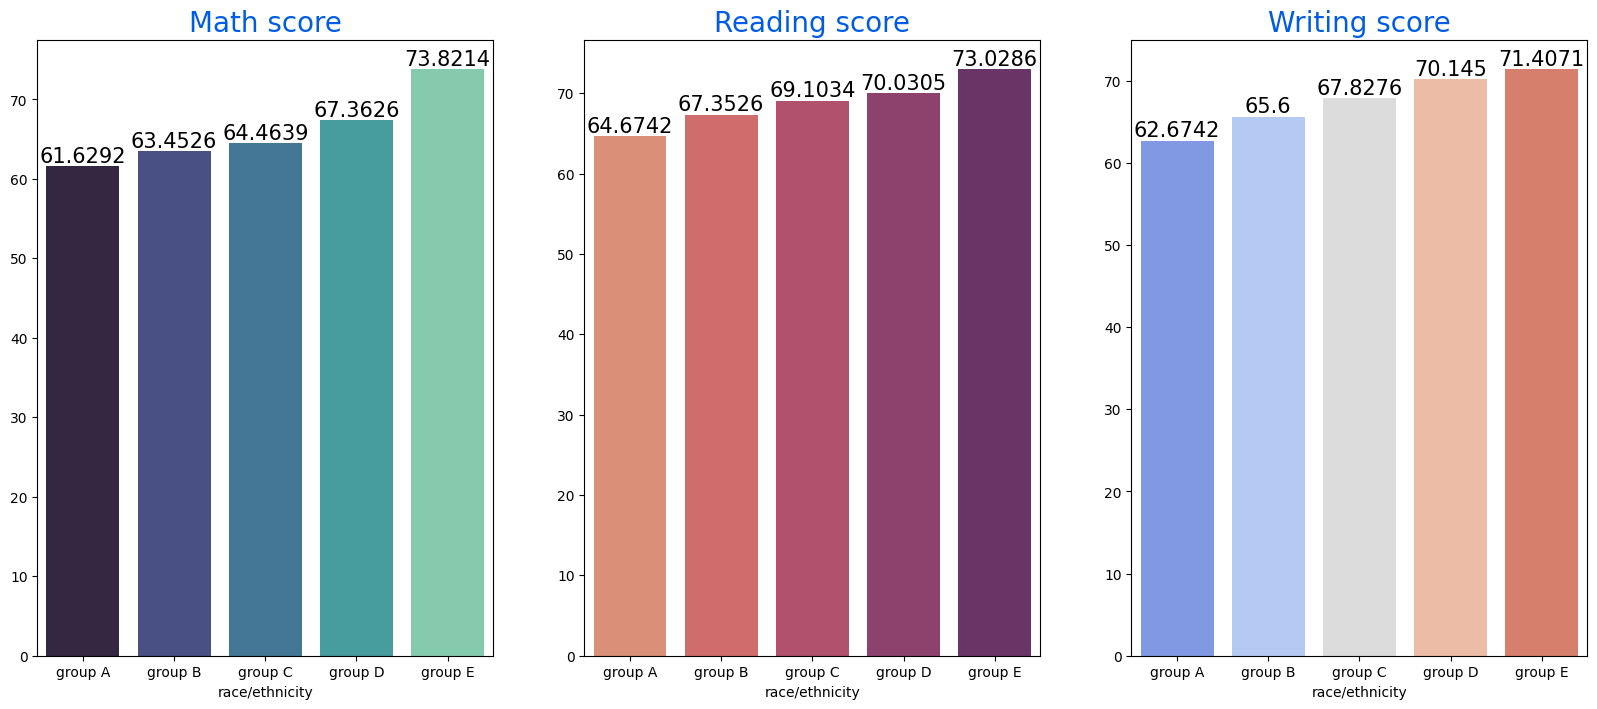

In [56]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


# Insights

*Group E students have scored the highest marks.
*Group A students have scored the lowest marks.
*Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

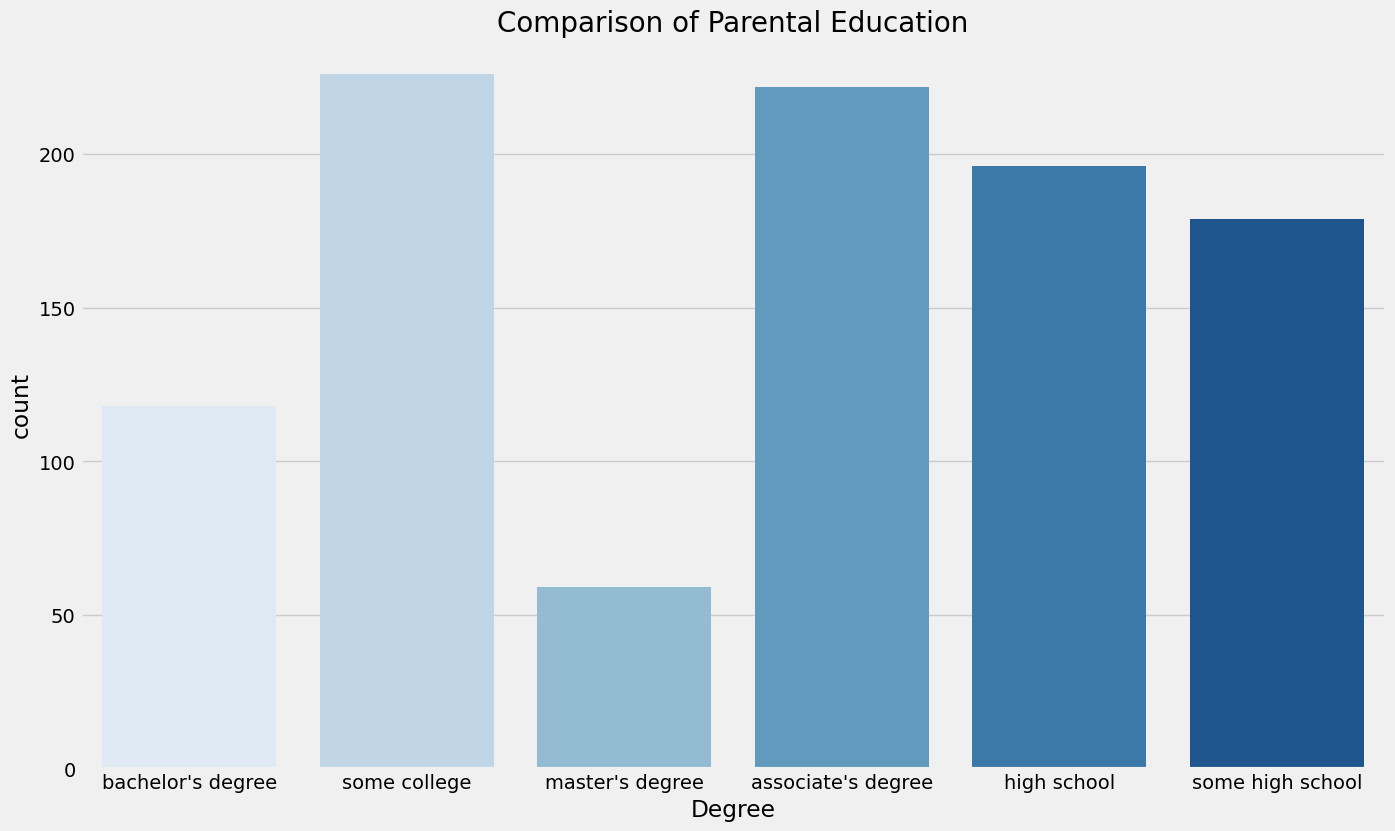

In [57]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x = df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights

*Largest number of parents are from some college.

In [59]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'female'

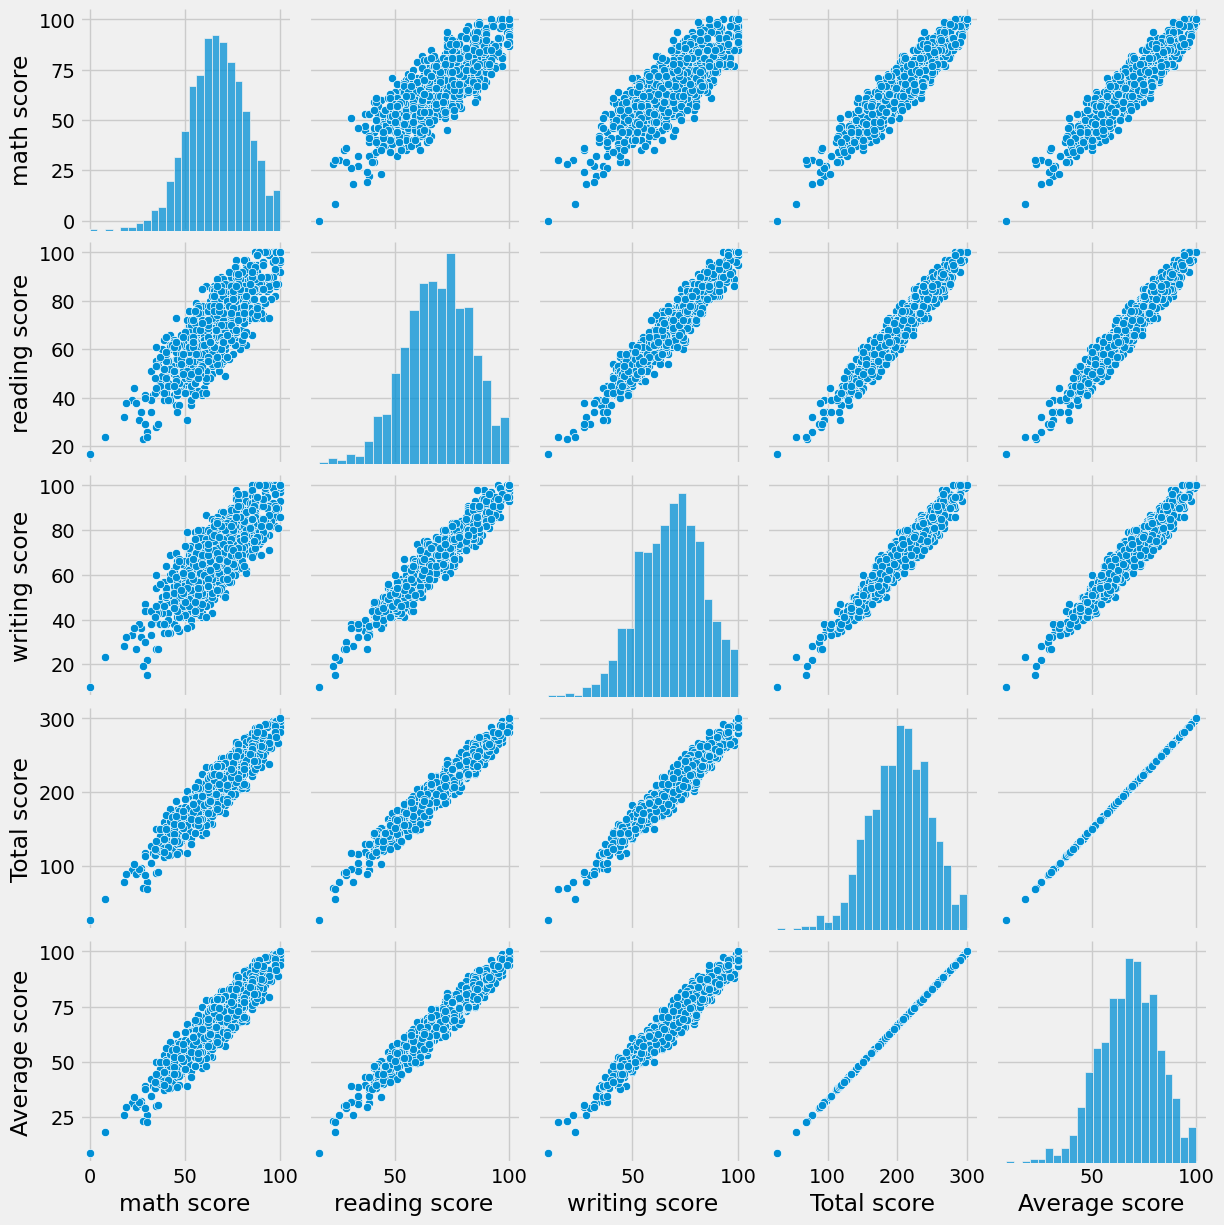

In [60]:
sns.pairplot(df)

# Insights

*The score of student whose parents possess master and bachelor level education are higher than others.

4.4.4 LUNCH COLUMN

Which type of lunch is most common amoung students ?

What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

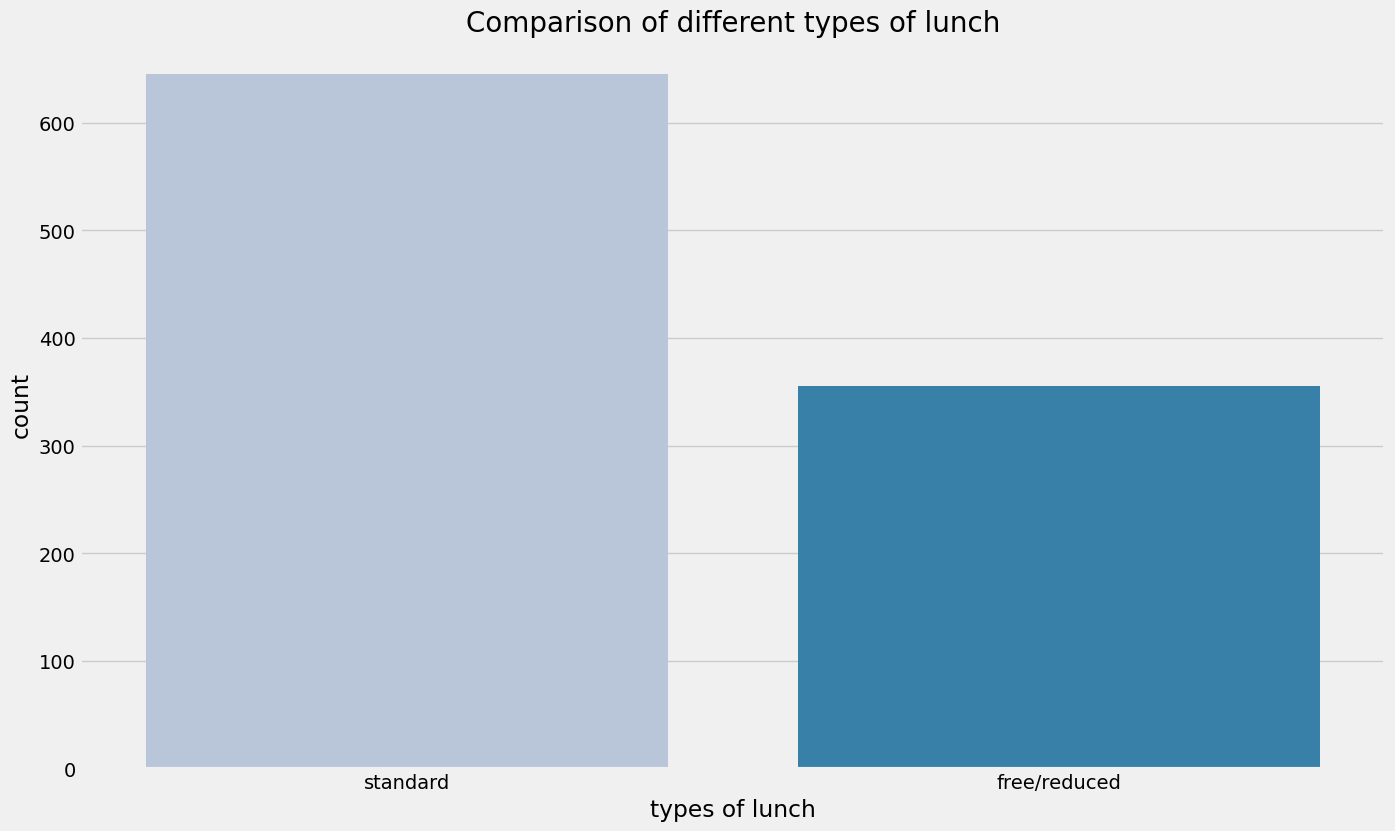

In [69]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights

*Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

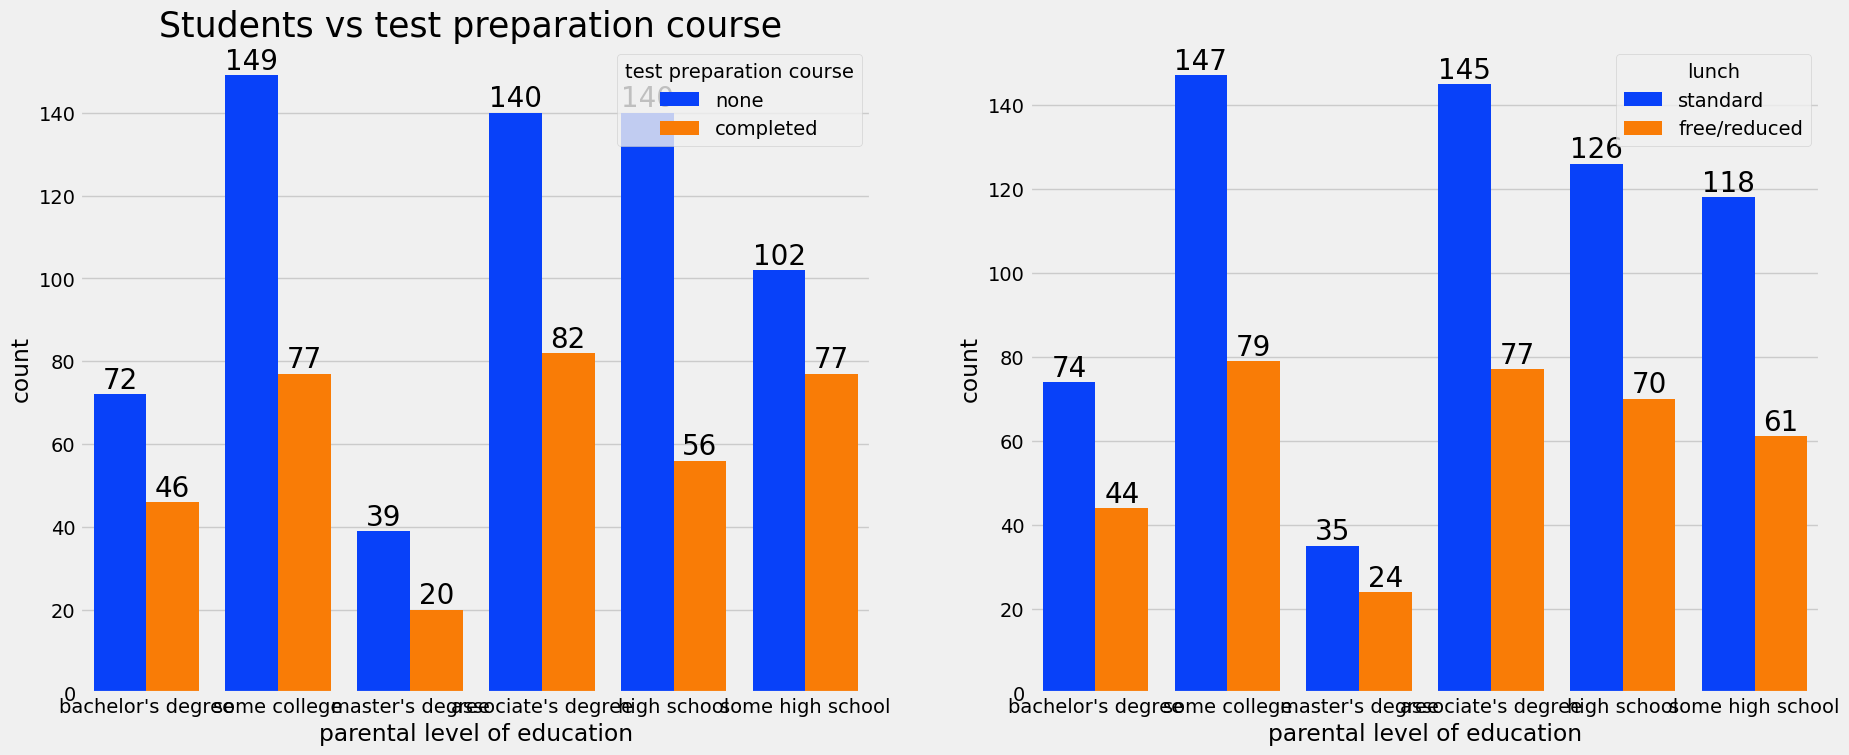

In [63]:

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   


# Insights

* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.4.5 TEST PREPARATION COURSE COLUMN
Which type of lunch is most common amoung students ?

Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='lunch', ylabel='writing score'>

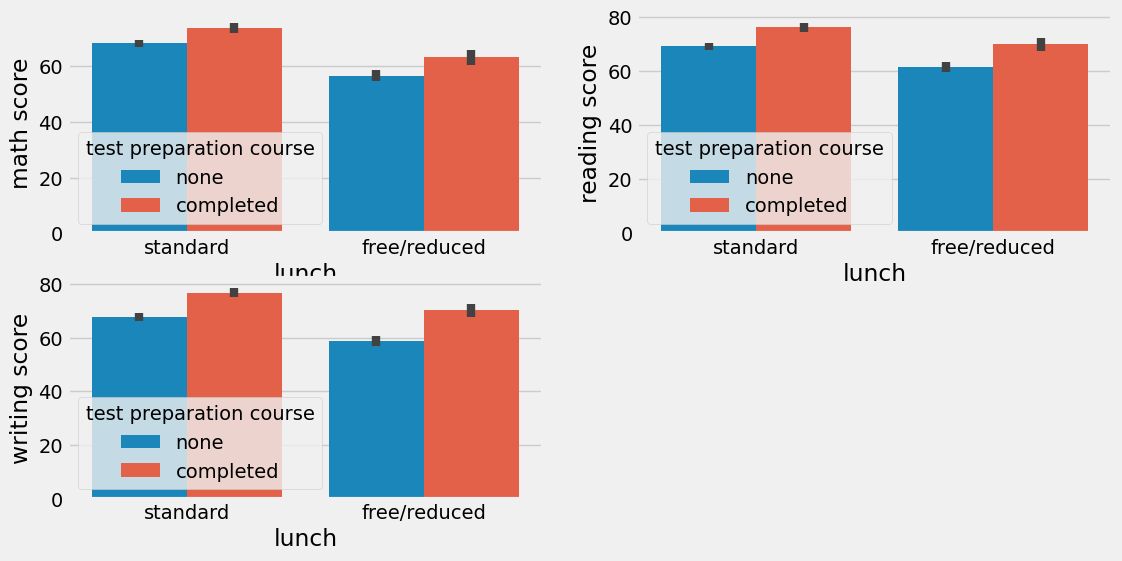

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

# Insights

*Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4.4.6 CHECKING OUTLIERS

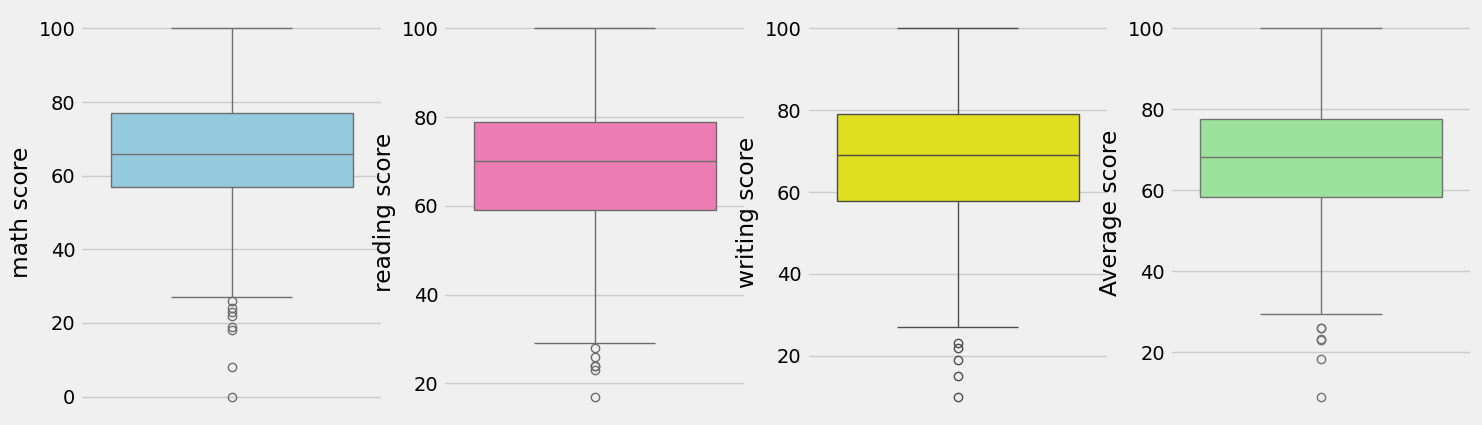

In [66]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average score'],color='lightgreen')
plt.show()

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

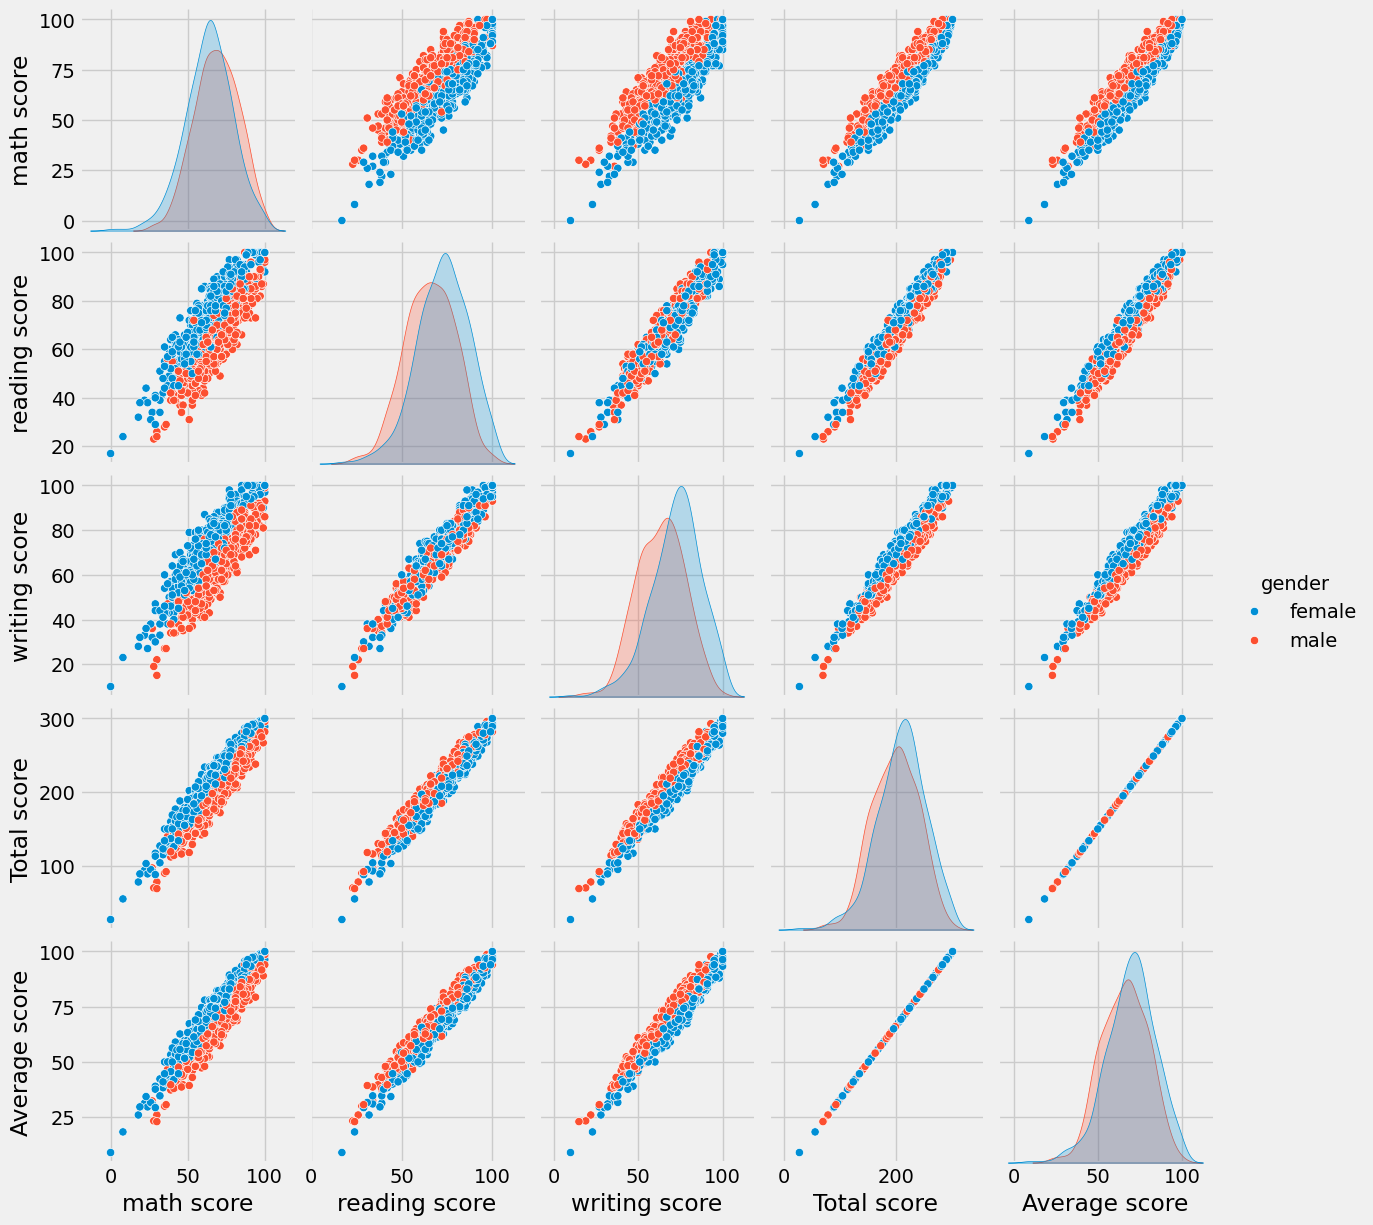

In [67]:
sns.pairplot(df,hue = 'gender')
plt.show()

# Insights

*From the above plot it is clear that all the scores increase linearly with each other.

5. Conclusions


Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.